In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Logistic Regression으로 wine 분류하기

In [3]:
wine = pd.read_csv('../Data/wine.csv')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine['class'].unique()
# 0 : red wine
# 1 : white wine

array([0., 1.])

In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
wine.shape

(6497, 4)

In [8]:
# Feature n Target
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [10]:
# Train n Test
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [11]:
print("Train :", train_input.shape)
print("Test  :", test_input.shape)

Train : (5197, 3)
Test  : (1300, 3)


In [12]:
# 정규화
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [13]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print("Train score :", lr.score(train_scaled, train_target))
print("Test  score :", lr.score(test_scaled, test_target))

Train score : 0.7808350971714451
Test  score : 0.7776923076923077


In [14]:
# 가중치와 편차 구하기
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


---
### DecisionTree
- 선형회귀나 KNN처럼 전처리 과정이 필요 없다.

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print("Train score :", dt.score(train_scaled, train_target))
print("Test  score :", dt.score(test_scaled, test_target))

Train score : 0.996921300750433
Test  score : 0.8592307692307692


In [17]:
dt.fit(train_input, train_target)

print("Train score :", dt.score(train_input, train_target))
print("Test  score :", dt.score(test_input, test_target))

Train score : 0.996921300750433
Test  score : 0.8584615384615385


In [18]:
# 시각화
from sklearn.tree import plot_tree

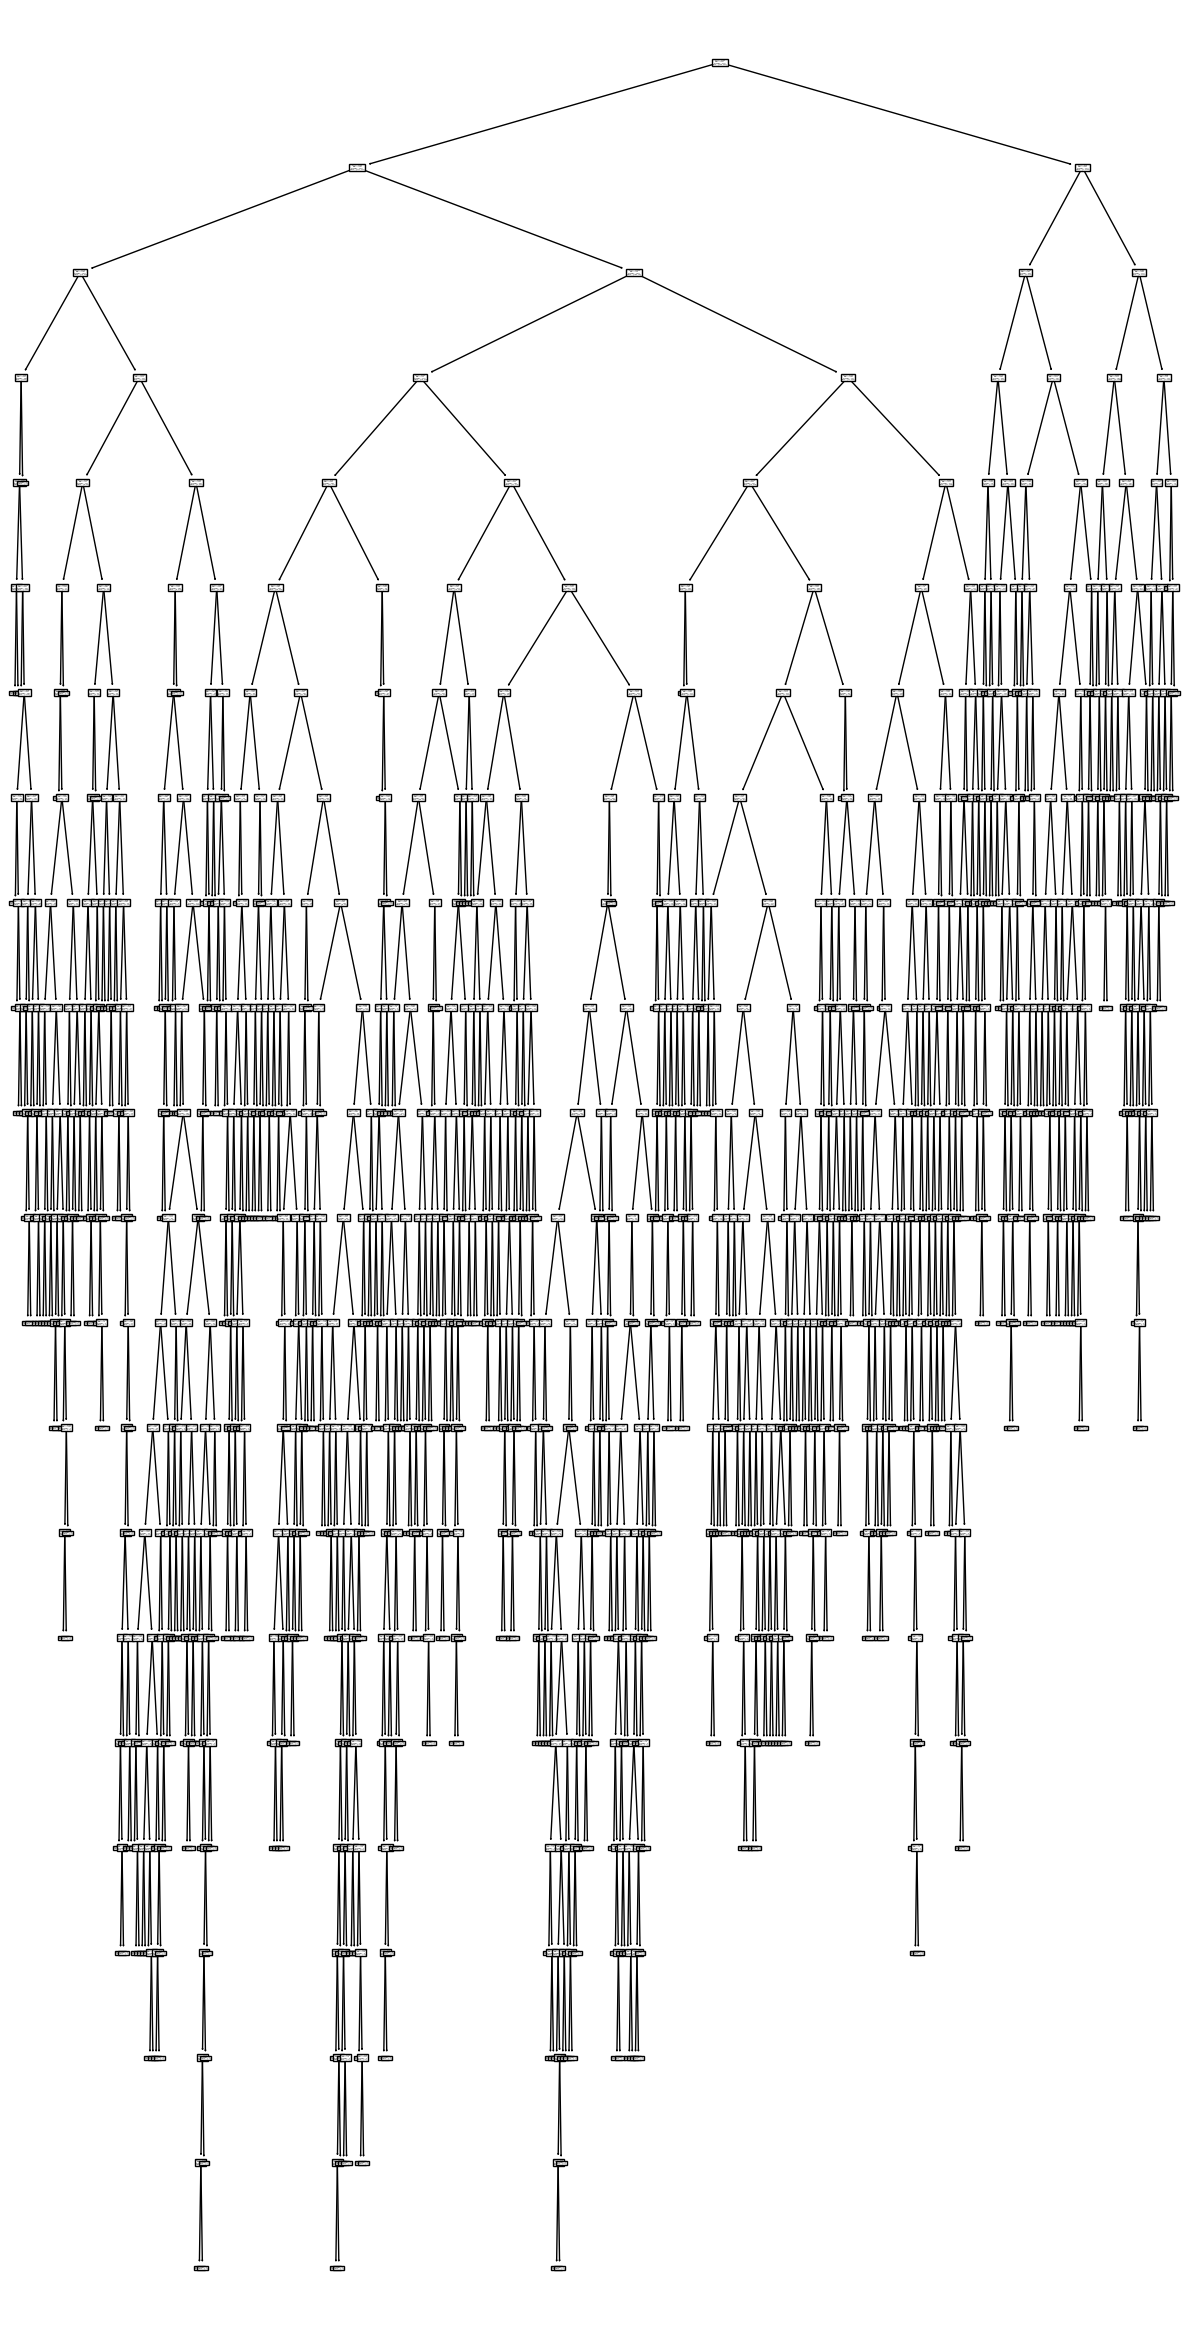

In [20]:
plt.figure(figsize=(15,30))
plot_tree(dt)
plt.show()

> 맨위의 단계를 root node 라고 하고 맨 마지막 단계를 leaf node 라고 함
> 시간이 많이 걸리고 단계가 너무 복잡함

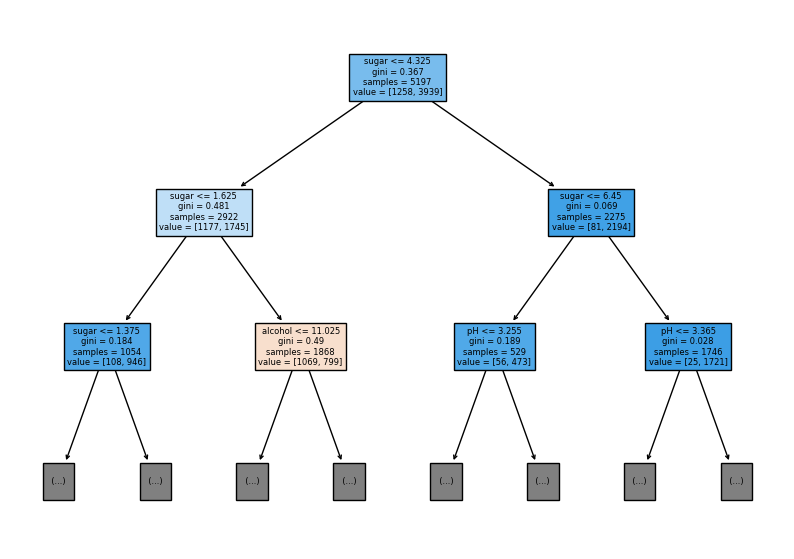

In [24]:
# Decision Tree의 단계(depth)를 단순하게 하자
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

### 가지치기 (Tree Pruning)
- max_depth의 parameter의 값을 조절한다
- decision tree의 과대적합을 막는다

In [27]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print("Train score :", dt.score(train_input, train_target))
print("Test  score :", dt.score(test_input, test_target))

Train score : 0.8454877814123533
Test  score : 0.8415384615384616


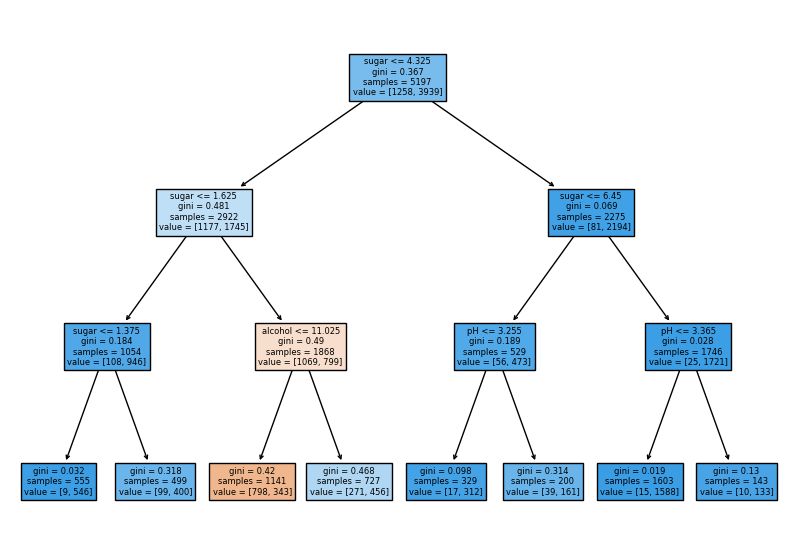

In [28]:
# Decision Tree의 단계(depth)를 단순하게 하자
plt.figure(figsize=(10,7))
plot_tree(dt,filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [29]:
# Feature 중요도
dt.feature_importances_

# sugar 가 red 와 white 을 나누는 중요한 기준이다 

array([0.12345626, 0.86862934, 0.0079144 ])

### 최적화 시키기

In [30]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005 ,random_state=42) # gini가 0.05% 까지 찾아라 가지를 몇번 쳐야되는지 까지 나는 몰루겠구
dt.fit(train_input, train_target)
print("Train score :", dt.score(train_input, train_target))
print("Test  score :", dt.score(test_input, test_target))

Train score : 0.8874350586877044
Test  score : 0.8615384615384616


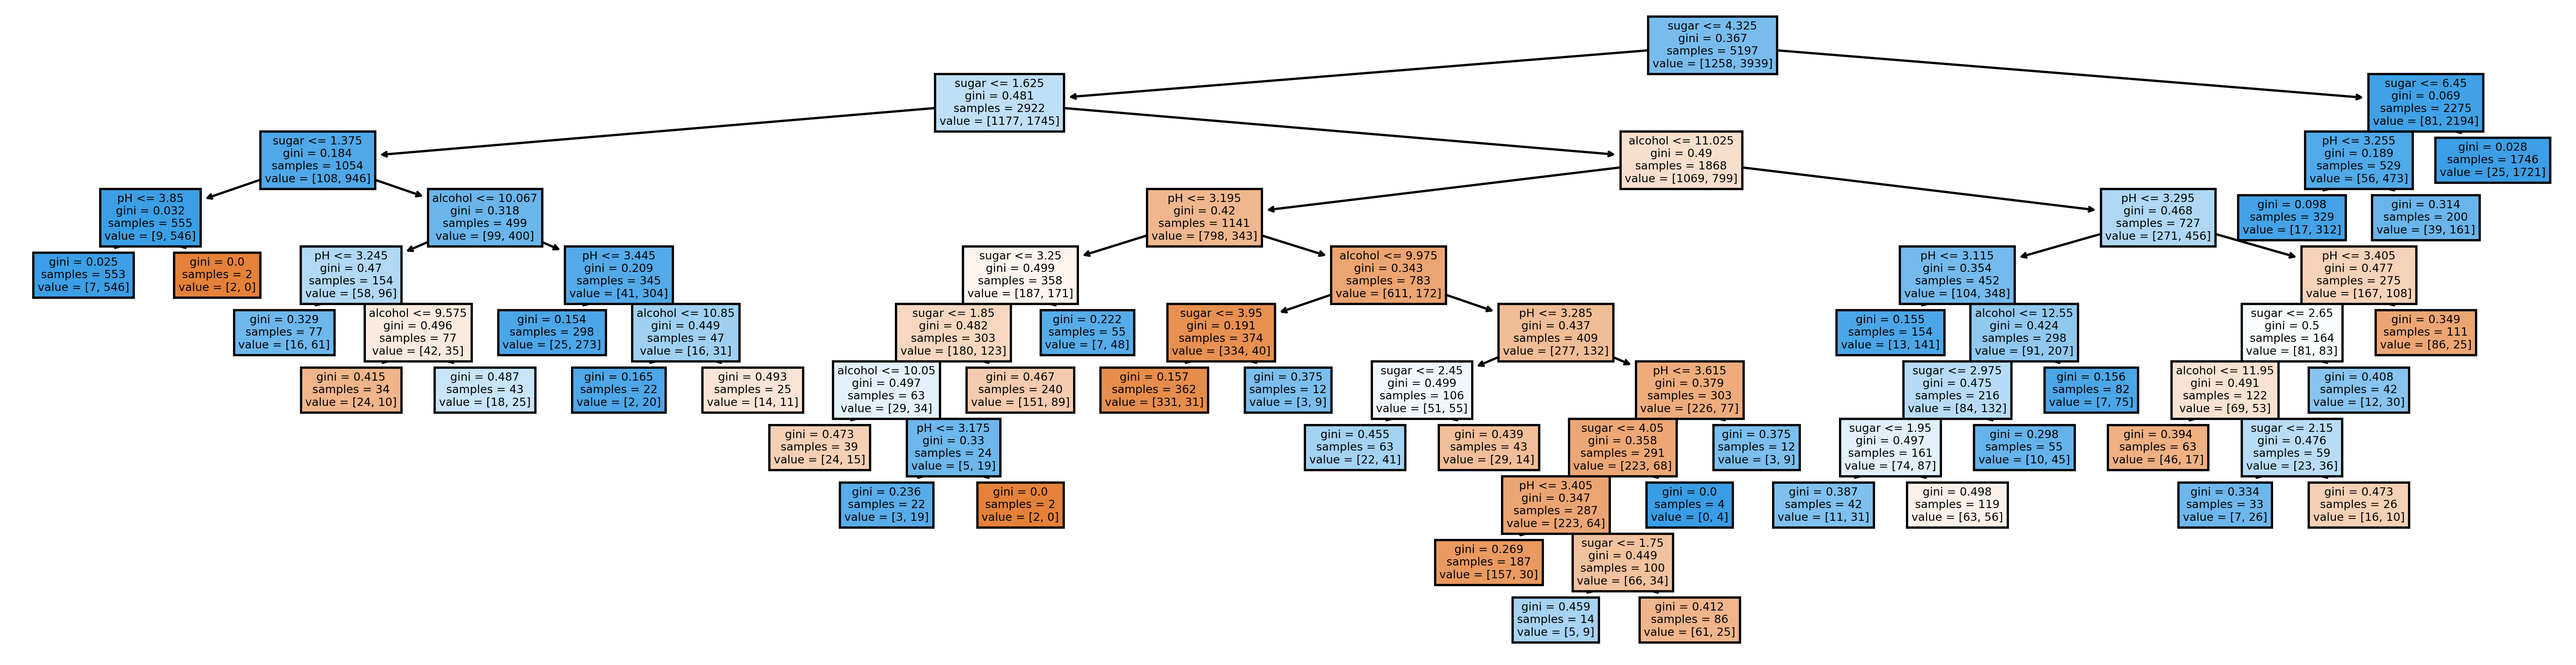

In [35]:
# Decision Tree의 단계(depth)를 단순하게 하자
plt.figure(figsize=(20,5), dpi=500)
plot_tree(dt,filled=True, feature_names=['alcohol','sugar','pH'])
plt.savefig('../Data/wine.jpg')
plt.show()

<Figure size 640x480 with 0 Axes>